In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## for block length 4 and t = (0, 3), (8, 11),
(16, 19 (missing data placement)

In [224]:
result = pd.read_csv('result_output/result_block4wot20_action_selection.csv', index_col= 0)
result.head()

,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill,original_data
patient_id,,,,,,,,
0,999,995,1000,997,999,1000,997,998
1,1000,1000,1000,1000,1000,1000,1000,1000
2,1000,1000,1000,1000,1000,1000,1000,1000
3,495,555,554,554,587,541,555,544
4,1000,1000,1000,1000,1000,1000,1000,1000


In [222]:
missing_patient_id = [3,  9, 14, 15, 16, 19, 22, 25, 28, 31, 33, 35, 38, 42, 43, 44, 49,
       51, 53, 56, 61, 65, 67, 71, 73, 75, 77, 78, 83, 85, 86, 87, 99]
result = result.loc[missing_patient_id]

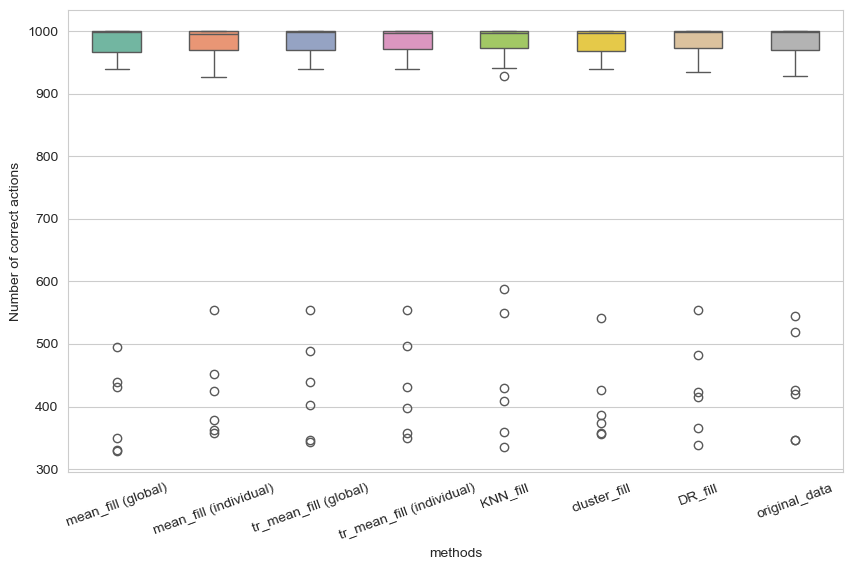

In [225]:
df_melted = result.melt(var_name='Columns', value_name='Values')
sns.set_style("whitegrid")
# Create a box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='Set2', width=0.5)

# Add title and labels
#plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')

plt.savefig('plots/box_b4wot20.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [233]:
para_estimation = pd.read_csv('result_output/block2/result_block2wot10_estimation.csv', index_col= 0)
para_estimation

,method,posterior mean of treatment 0,treatment 0 lower bound (95%),treatment 0 upper bound (95%),posterior mean of treatment 0 (original data ),posterior mean of treatment 1,treatment 1 lower bound (95%),treatment 1 upper bound (95%),posterior mean of treatment 1 (original data )
0,mean_fill (global),2.040115,2.039830,2.040400,2.038914,-0.015926,-0.016248,-0.015605,-0.021384
1,mean_fill (individual),2.029274,2.028988,2.029560,2.038914,-0.019440,-0.019770,-0.019109,-0.021384
2,tr_mean_fill (global),2.045761,2.045477,2.046045,2.038914,-0.022488,-0.022787,-0.022189,-0.021384
3,tr_mean_fill (individual),2.041318,2.041040,2.041596,2.038914,-0.021700,-0.021986,-0.021413,-0.021384
4,KNN_fill,2.042103,2.041816,2.042390,2.038914,-0.020963,-0.021258,-0.020668,-0.021384
5,cluster_fill,2.018151,2.017877,2.018425,2.038914,-0.024885,-0.025234,-0.024535,-0.021384
6,DR_fill,2.041640,2.041359,2.041922,2.038914,-0.024761,-0.025046,-0.024476,-0.021384


In [228]:
df = pd.read_pickle('result_output/result_block4wct20_raw.pkl')
df

mean_fill (global)                                              \
    mean of treatment 0 mean of treatment 1 variance of treatment 0   
0              1.984697            0.047525                0.000569   
1              1.989654            0.043626                0.000569   
2              1.992680            0.043414                0.000569   
3              1.985020            0.042737                0.000569   
4              1.986914            0.042737                0.000569   
..                  ...                 ...                     ...   
995            1.985043            0.041282                0.000569   
996            1.990610            0.042737                0.000569   
997            1.993902            0.044381                0.000569   
998            1.987092            0.042737                0.000569   
999            1.985262            0.043450                0.000569   

                            mean_fill (individual)                      \
    variance of treatment 1    mean of treatment 0 mean of treatment 1   
0                  0.002232               1.991076            0.050901   
1                  0.002237               1.993407            0.048590   
2                  0.002237               1.986726            0.044918   
3                  0.002242               1.989007            0.049206   
4                  0.002242               1.991936            0.050166   
..                      ...                    ...                 ...   
995                0.002232               1.988227            0.050166   
996                0.002242               1.991337            0.053268   
997                0.002232               1.991250            0.050166   
998                0.002242               1.990191            0.050166   
999                0.002237               1.986985            0.050166   

                                                    tr_mean_fill (global)  \
    variance of treatment 0 variance of treatment 1   mean of treatment 0   
0                  0.000540                0.002222              1.989563   
1                  0.000540                0.002222              1.991355   
2                  0.000540                0.002222              1.992350   
3                  0.000540                0.002212              1.999024   
4                  0.000539                0.002227              1.994801   
..                      ...                     ...                   ...   
995                0.000539                0.002227              1.989044   
996                0.000540                0.002222              1.985500   
997                0.000539                0.002227              1.988093   
998                0.000539                0.002227              1.990286   
999                0.000539                0.002227              1.993281   

                         ...                KNN_fill                          \
    mean of treatment 1  ... variance of treatment 0 variance of treatment 1   
0              0.040752  ...                0.000539                0.002227   
1              0.040307  ...                0.000539                0.002227   
2              0.046695  ...                0.000539                0.002227   
3              0.042737  ...                0.000539                0.002227   
4              0.042737  ...                0.000539                0.002227   
..                  ...  ...                     ...                     ...   
995            0.042737  ...                0.000540                0.002217   
996            0.042143  ...                0.000540                0.002222   
997            0.042737  ...                0.000540                0.002222   
998            0.043966  ...                0.000539                0.002227   
999            0.042737  ...                0.000539                0.002227   

           cluster_fill                                              \
    

In [ ]:
from evaluate.evaluation import Evaluatemethod

In [192]:
df1 = pd.read_csv('data/two_treatment/dt4_2024_11_10_without_context.csv' ,index_col=0)
block_length = 4
length = 6 * block_length
t = 20

methods =["mean_fill (global)", "mean_fill (individual)", "tr_mean_fill (global)", "tr_mean_fill (individual)", "KNN_fill", "cluster_fill",
               "DR_fill"]

In [193]:
eva = Evaluatemethod(t,block_length, length, df1)

In [197]:
mean_0 = []
mean_1 = []
lower_bound_tr0 = []
upper_bound_tr0 = []
lower_bound_tr1 = []
upper_bound_tr1 = []


In [198]:
for method in methods:
    mean_out = df[method]
    lower_bound0, upper_bound0 = eva.confidence_interval(mean_out, 'mean of treatment 0')
    lower_bound1, upper_bound1 = eva.confidence_interval(mean_out, 'mean of treatment 1')

    ## append all data
    mean_0.append(mean_out['mean of treatment 0'].mean())
    mean_1.append(mean_out['mean of treatment 1'].mean())
    lower_bound_tr0.append(lower_bound0)
    upper_bound_tr0.append(upper_bound0)
    lower_bound_tr1.append(lower_bound1)
    upper_bound_tr1.append(upper_bound1)

In [199]:
par_estimation_result= {
    'method': ["mean_fill (global)", "mean_fill (individual)", "tr_mean_fill (global)", "tr_mean_fill (individual)", "KNN_fill", "cluster_fill",
               "DR_fill"],
    'posterior mean of treatment 0': mean_0,
    'treatment 0 lower bound (95%)': lower_bound_tr0,
    'treatment 0 upper bound (95%)': upper_bound_tr0,
    
    'posterior mean of treatment 1': mean_1,
    'treatment 1 lower bound (95%)': lower_bound_tr1,
    'treatment 1 upper bound (95%)': upper_bound_tr1,
    
}
estimation_result = pd.DataFrame(par_estimation_result)

In [123]:
para_estimation = pd.read_csv('result_output/block3/result_block3wot15_estimation.csv', index_col= 0)
para_estimation

,method,posterior mean of treatment 0,treatment 0 lower bound (95%),treatment 0 upper bound (95%),posterior mean of treatment 0 (original data ),posterior mean of treatment 1,treatment 1 lower bound (95%),treatment 1 upper bound (95%),posterior mean of treatment 1 (original data )
0,mean_fill (global),2.018938,2.018698,2.019178,2.023314,-0.002449,-0.002644,-0.002254,-0.002772
1,mean_fill (individual),2.012017,2.011789,2.012246,2.023314,-0.000370,-0.000569,-0.000171,-0.002772
2,tr_mean_fill (global),2.021651,2.021416,2.021885,2.023314,-0.002510,-0.002716,-0.002304,-0.002772
3,tr_mean_fill (individual),2.022612,2.022382,2.022842,2.023314,-0.000434,-0.000620,-0.000247,-0.002772
4,KNN_fill,2.025947,2.025715,2.026179,2.023314,0.000152,-0.000040,0.000343,-0.002772
5,cluster_fill,2.022663,2.022430,2.022896,2.023314,-0.002451,-0.002640,-0.002261,-0.002772
6,DR_fill,2.022388,2.022155,2.022622,2.023314,-0.002294,-0.002491,-0.002097,-0.002772


In [125]:
df = pd.read_pickle('result_output/block3/result_block3wot15_raw.pkl')
save_path = 'plots/den_b3wot15.jpg'

In [126]:
df

mean_fill (global)                                              \
    mean of treatment 0 mean of treatment 1 variance of treatment 0   
0              2.014449           -0.007553                0.000725   
1              2.019696            0.002344                0.000725   
2              2.014711           -0.004077                0.000725   
3              2.019492           -0.002411                0.000724   
4              2.020321            0.003848                0.000725   
..                  ...                 ...                     ...   
995            2.019598           -0.007939                0.000725   
996            2.021153           -0.002411                0.000724   
997            2.022036           -0.002411                0.000724   
998            2.020064           -0.009095                0.000725   
999            2.018953           -0.004477                0.000725   

                            mean_fill (individual)                      \
    variance of treatment 1    mean of treatment 0 mean of treatment 1   
0                  0.003268               2.012319           -0.003362   
1                  0.003268               2.018555           -0.002336   
2                  0.003268               2.008218           -0.001247   
3                  0.003279               2.015801            0.000923   
4                  0.003257               2.015115           -0.007338   
..                      ...                    ...                 ...   
995                0.003268               2.002309           -0.003485   
996                0.003279               2.011635           -0.000410   
997                0.003279               2.012593           -0.002717   
998                0.003268               2.014794           -0.002420   
999                0.003268               2.010193            0.011952   

                                                    tr_mean_fill (global)  \
    variance of treatment 0 variance of treatment 1   mean of treatment 0   
0                  0.000697                0.003236              2.024256   
1                  0.000696                0.003247              2.019105   
2                  0.000697                0.003226              2.023054   
3                  0.000697                0.003236              2.021741   
4                  0.000696                0.003247              2.018403   
..                      ...                     ...                   ...   
995                0.000696                0.003247              2.018504   
996                0.000696                0.003257              2.023971   
997                0.000697                0.003236              2.025685   
998                0.000696                0.003247              2.025420   
999                0.000697                0.003226              2.019760   

                         ...                KNN_fill                          \
    mean of treatment 1  ... variance of treatment 0 variance of treatment 1   
0              0.000134  ...                0.000696                0.003247   
1             -0.006548  ...                0.000696                0.003257   
2             -0.001010  ...                0.000696                0.003247   
3             -0.000072  ...                0.000696                0.003247   
4             -0.004143  ...                0.000696                0.003247   
..                  ...  ...                     ...                     ...   
995           -0.005519  ...                0.000696                0.003247   
996           -0.007182  ...                0.000696                0.003247   
997           -0.009056  ...                0.000696                0.003247   
998           -0.004407  ...                0.000696                0.003257   
999           -0.002266  ...                0.000696                0.003247   

           cluster_fill                                              \
    

In [ ]:
mean_0 = 2.023314	
mean_1 = -0.002772

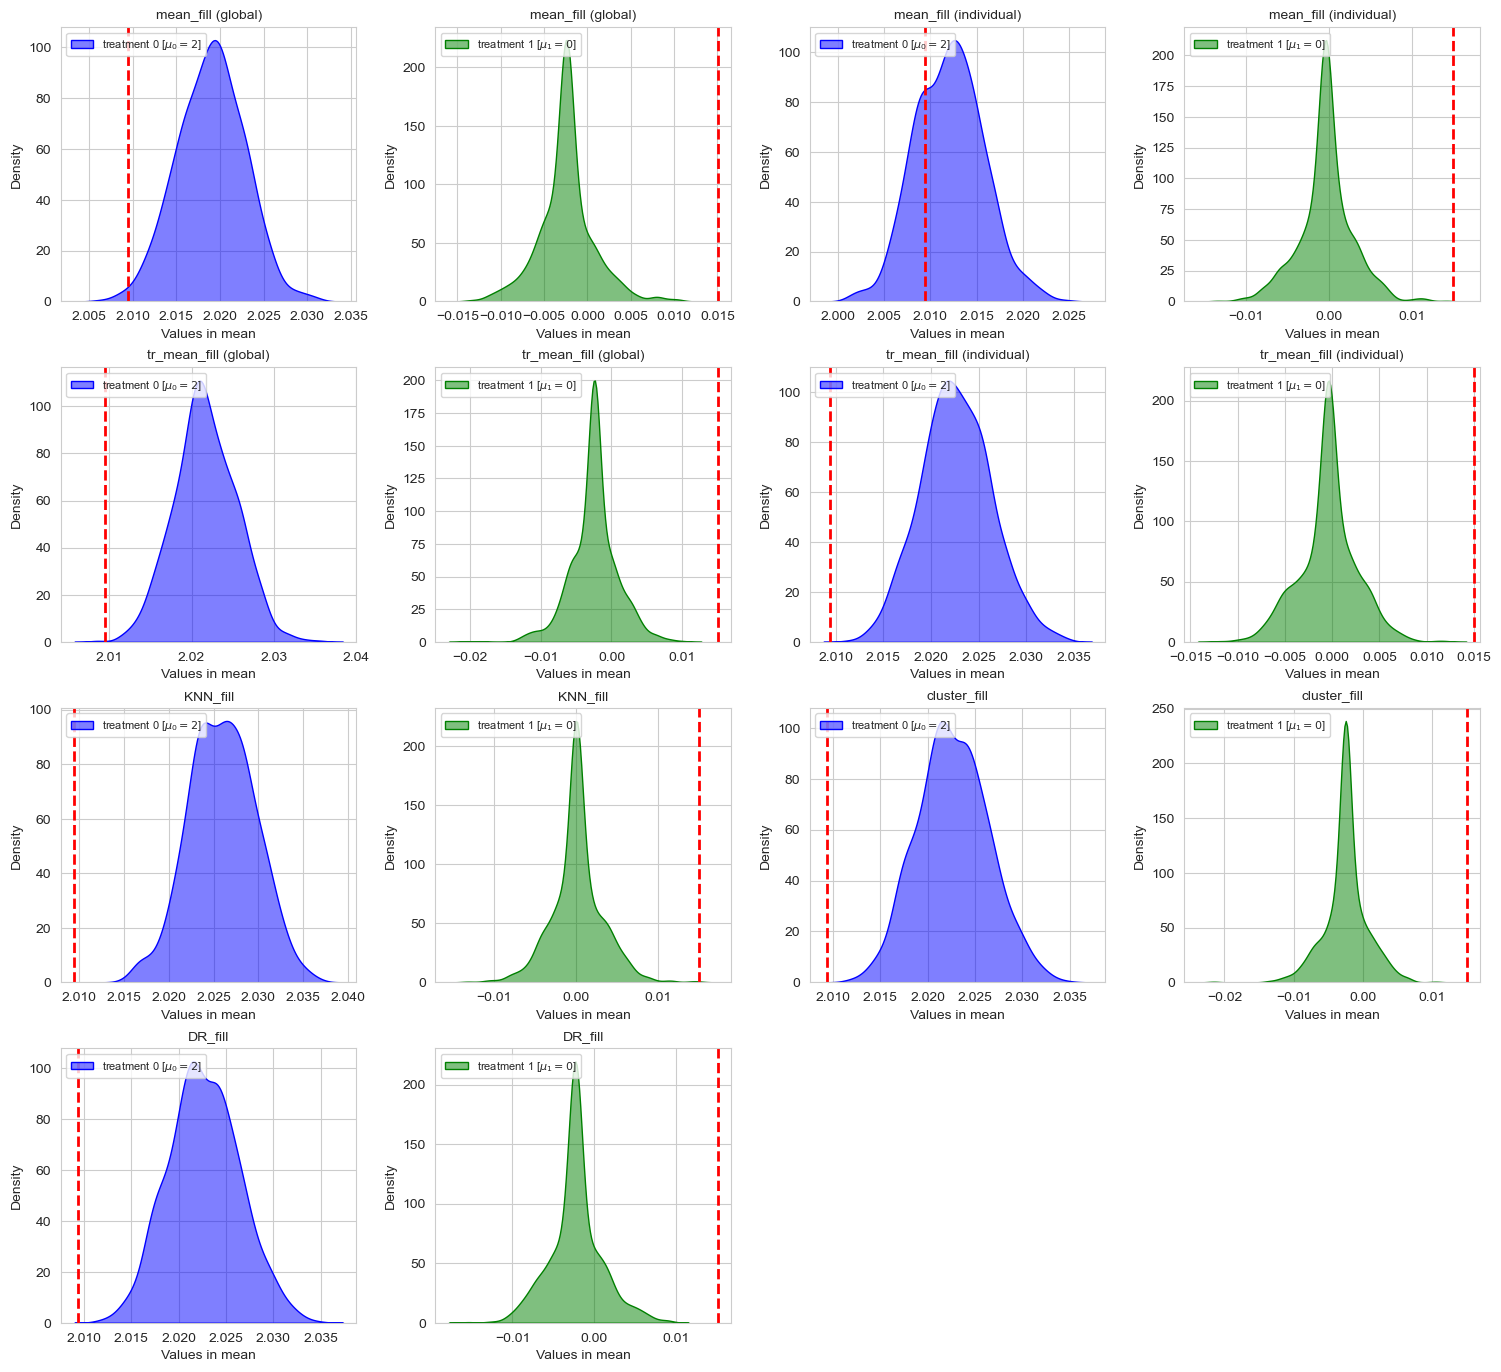

In [ ]:

fig, axs = plt.subplots(4, 4, figsize=(15, 15 ))
sns.set_style("whitegrid")
# List of row titles
row_titles = ["mean_fill (global)", "mean_fill (individual)", "tr_mean_fill (global)", "tr_mean_fill (individual)", 
              "KNN_fill", "cluster_fill","DR_fill"]


sns.kdeplot(df[row_titles[0]]['mean of treatment 0'], fill=True, color='blue',  
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[0,0])

axs[0, 0].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[0, 0].set_xlabel('Values in mean')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend(loc='upper left', fontsize = 8)
axs[0, 0].set_title(row_titles[0], fontsize = 10)

sns.kdeplot(df[row_titles[0]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[0,1])

axs[0, 1].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[0, 1].set_xlabel('Values in mean')
axs[0, 1].set_ylabel('Density')
axs[0, 1].legend(loc='upper left', fontsize = 8)
axs[0, 1].set_title(row_titles[0], fontsize = 10)

sns.kdeplot(df[row_titles[1]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[0,2])

axs[0,2 ].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[0,2].set_xlabel('Values in mean')
axs[0,2].set_ylabel('Density')
axs[0,2].legend(loc='upper left', fontsize = 8)
axs[0,2].set_title(row_titles[1], fontsize = 10)

sns.kdeplot(df[row_titles[1]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[0,3])
axs[0, 3].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[0,3].set_xlabel('Values in mean')
axs[0,3].set_ylabel('Density')
axs[0,3].legend(loc='upper left', fontsize = 8)
axs[0,3].set_title(row_titles[1], fontsize = 10)

sns.kdeplot(df[row_titles[2]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[1,0])

axs[1, 0].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[1, 0].set_xlabel('Values in mean')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend(loc='upper left', fontsize = 8)
axs[1, 0].set_title(row_titles[2], fontsize = 10)

sns.kdeplot(df[row_titles[2]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[1,1])

axs[1, 1].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[1,1].set_xlabel('Values in mean')
axs[1,1].set_ylabel('Density')
axs[1,1].legend(loc='upper left', fontsize = 8)
axs[1, 1].set_title(row_titles[2], fontsize = 10)

sns.kdeplot(df[row_titles[3]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[1,2])

axs[1, 2].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[1, 2].set_xlabel('Values in mean')
axs[1, 2].set_ylabel('Density')
axs[1, 2].legend(loc='upper left', fontsize = 8)
axs[1, 2].set_title(row_titles[3], fontsize = 10)

sns.kdeplot(df[row_titles[3]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[1,3])

axs[1, 3].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[1,3].set_xlabel('Values in mean')
axs[1,3].set_ylabel('Density')
axs[1,3].legend(loc='upper left', fontsize = 8)
axs[1,3].set_title(row_titles[3], fontsize = 10)

sns.kdeplot(df[row_titles[4]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[2,0])

axs[2, 0].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[2, 0].set_xlabel('Values in mean')
axs[2, 0].set_ylabel('Density')
axs[2, 0].legend(loc='upper left', fontsize = 8)
axs[2, 0].set_title(row_titles[4], fontsize = 10)

sns.kdeplot(df[row_titles[4]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[2,1])

axs[2, 1].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[2,1].set_xlabel('Values in mean')
axs[2,1].set_ylabel('Density')
axs[2,1].legend(loc='upper left', fontsize = 8)
axs[2, 1].set_title(row_titles[4], fontsize = 10)

sns.kdeplot(df[row_titles[5]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[2,2])

axs[2, 2].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[2, 2].set_xlabel('Values in mean')
axs[2, 2].set_ylabel('Density')
axs[2, 2].legend(loc='upper left', fontsize = 8)
axs[2, 2].set_title(row_titles[5], fontsize = 10)

sns.kdeplot(df[row_titles[5]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[2,3])

axs[2, 3].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[2,3].set_xlabel('Values in mean')
axs[2,3].set_ylabel('Density')
axs[2,3].legend(loc='upper left', fontsize = 8)
axs[2, 3].set_title(row_titles[5], fontsize = 10)

sns.kdeplot(df[row_titles[5]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[3,0])

axs[3, 0].axvline(x= mean_0, color='red', linestyle='--', linewidth=2)
axs[3, 0].set_xlabel('Values in mean')
axs[3, 0].set_ylabel('Density')
axs[3, 0].legend(loc='upper left', fontsize = 8)
axs[3, 0].set_title(row_titles[6], fontsize = 10)

sns.kdeplot(df[row_titles[6]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[3,1])

axs[3, 1].axvline(x= mean_1, color='red', linestyle='--', linewidth=2)
axs[3,1].set_xlabel('Values in mean')
axs[3,1].set_ylabel('Density')
axs[3,1].legend(loc='upper left', fontsize = 8)
axs[3, 1].set_title(row_titles[6], fontsize = 10)

#fig.suptitle('Density Plot for mean of treatment 0 and 1', fontsize = 12)
for i in range(2, 4):
    fig.delaxes(axs[3, i])
    
  # Hide the markers
fig.tight_layout()
fig.subplots_adjust(top=0.9)

plt.savefig(save_path, format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## for block length 1 and t = 3 (missing data placement)

In [46]:
result = pd.read_csv('result_output/result_block1wot4_action_selection.csv', index_col= 0)
result.head()

,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill,original_data
patient_id,,,,,,,,
0,970,969,975,968,973,977,964,973
1,952,962,961,961,960,962,957,965
2,810,740,826,764,757,856,833,919
3,916,920,908,927,915,926,910,936
4,991,992,991,993,993,989,991,992


In [47]:
result = result.loc[missing_patient_id]

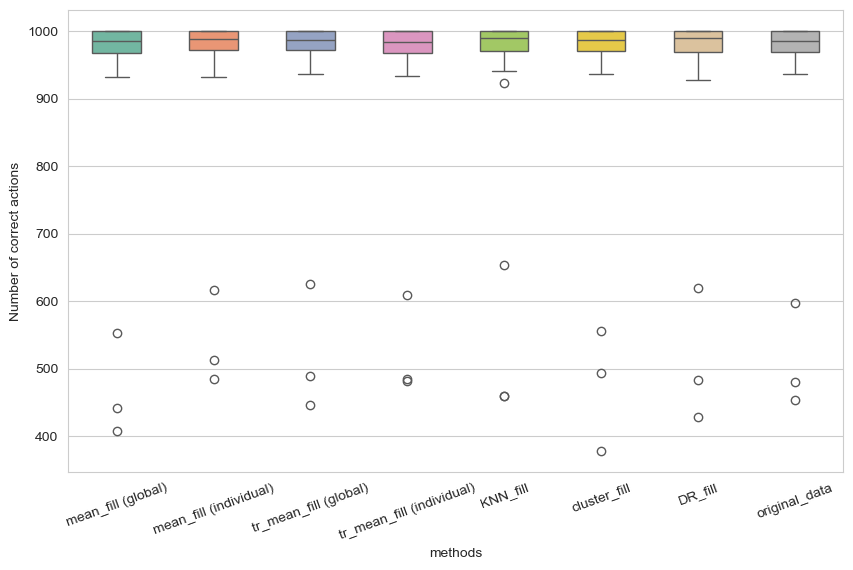

In [138]:
df_melted = result.melt(var_name='Columns', value_name='Values')
sns.set_style("whitegrid")
# Create a box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='Set2', width =0.5)

# Add title and labels
#plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')

plt.savefig('plots/box_b5wot5.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [12]:
para_estimation = pd.read_csv('result_output/result_block1wot4_estimation.csv', index_col= 0)
para_estimation

,method,posterior mean of treatment 0,treatment 0 lower bound (95%),treatment 0 upper bound (95%),posterior mean of treatment 0 (original data ),posterior mean of treatment 1,treatment 1 lower bound (95%),treatment 1 upper bound (95%),posterior mean of treatment 1 (original data )
0,mean_fill (global),1.961481,1.960960,1.962003,1.976902,-0.069036,-0.069880,-0.068193,-0.064128
1,mean_fill (individual),1.954125,1.953610,1.954640,1.976902,-0.078417,-0.079345,-0.077489,-0.064128
2,tr_mean_fill (global),1.971635,1.971088,1.972182,1.976902,-0.079487,-0.080247,-0.078726,-0.064128
3,tr_mean_fill (individual),1.971141,1.970567,1.971715,1.976902,-0.077404,-0.078158,-0.076651,-0.064128
4,KNN_fill,1.964916,1.964389,1.965444,1.976902,-0.076546,-0.077431,-0.075662,-0.064128
5,cluster_fill,1.941291,1.940799,1.941783,1.976902,-0.078244,-0.079226,-0.077261,-0.064128
6,DR_fill,1.971169,1.970611,1.971726,1.976902,-0.079348,-0.080070,-0.078625,-0.064128


In [15]:
df = pd.read_pickle('result_output/block1/result_block1wot4_raw.pkl')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


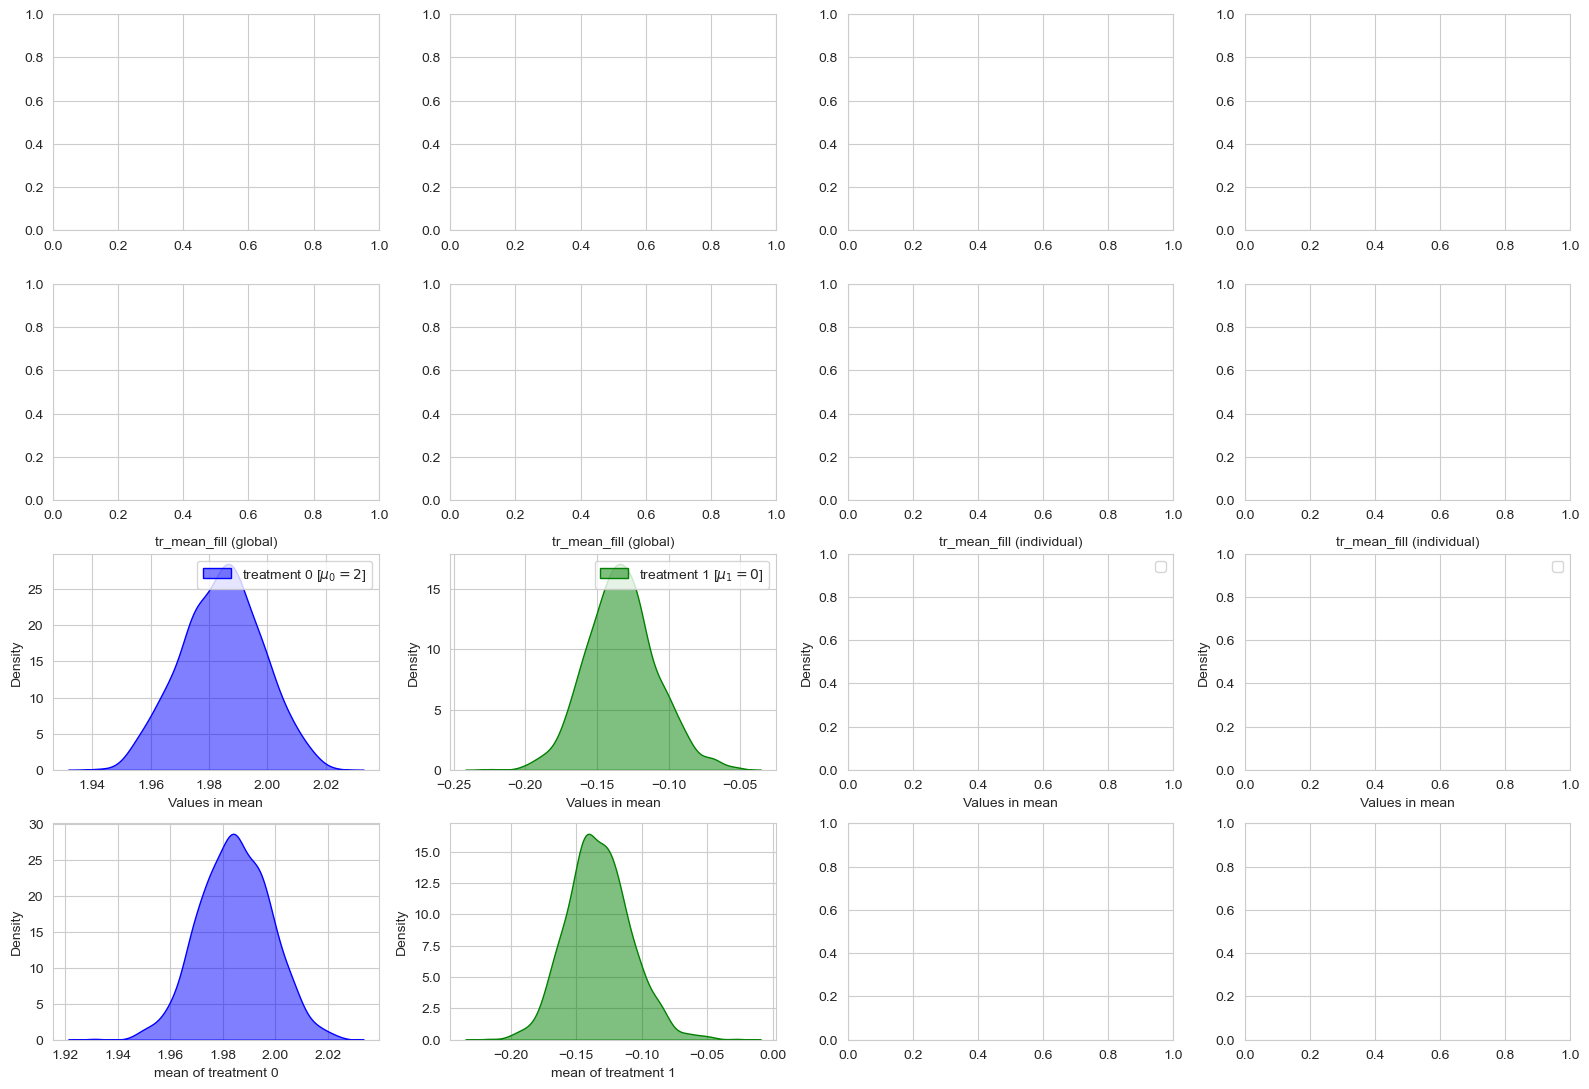

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12 ))
sns.set_style("whitegrid")
# List of row titles
row_titles = ["mean_fill (global)", "mean_fill (individual)", "tr_mean_fill (global)", "tr_mean_fill (individual)", 
              "KNN_fill", "cluster_fill","DR_fill"]


sns.kdeplot(df[row_titles[0]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[0,0])

axs[0, 0].set_xlabel('Values in mean')
axs[0, 0].set_ylabel('Density')
axs[0, 0].legend(loc='upper left', fontsize = 8)
axs[0, 0].set_title(row_titles[0], fontsize = 10)

sns.kdeplot(df[row_titles[0]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[0,1])

axs[0,1].set_xlabel('Values in mean')
axs[0,1].set_ylabel('Density')
axs[0,1].legend(loc='upper left', fontsize = 8)
axs[0, 1].set_title(row_titles[0], fontsize = 10)

sns.kdeplot(df[row_titles[1]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[0,2])

axs[0,2].set_xlabel('Values in mean')
axs[0,2].set_ylabel('Density')
axs[0,2].legend(loc='upper left', fontsize = 8)
axs[0,2].set_title(row_titles[1], fontsize = 10)

sns.kdeplot(df[row_titles[1]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[0,3])

axs[0,3].set_xlabel('Values in mean')
axs[0,3].set_ylabel('Density')
axs[0,3].legend(loc='upper left', fontsize = 8)
axs[0,3].set_title(row_titles[1], fontsize = 10)

sns.kdeplot(df[row_titles[2]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[1,0])

axs[1, 0].set_xlabel('Values in mean')
axs[1, 0].set_ylabel('Density')
axs[1, 0].legend(loc='upper left', fontsize = 8)
axs[1, 0].set_title(row_titles[2], fontsize = 10)

sns.kdeplot(df[row_titles[2]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[1,1])

axs[1,1].set_xlabel('Values in mean')
axs[1,1].set_ylabel('Density')
axs[1,1].legend(loc='upper left', fontsize = 8)
axs[1, 1].set_title(row_titles[2], fontsize = 10)

sns.kdeplot(df[row_titles[3]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[1,2])

axs[1, 2].set_xlabel('Values in mean')
axs[1, 2].set_ylabel('Density')
axs[1, 2].legend(loc='upper left', fontsize = 8)
axs[1, 2].set_title(row_titles[3], fontsize = 10)

sns.kdeplot(df[row_titles[3]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[1,3])

axs[1,3].set_xlabel('Values in mean')
axs[1,3].set_ylabel('Density')
axs[1,3].legend(loc='upper left', fontsize = 8)
axs[1,3].set_title(row_titles[3], fontsize = 10)

sns.kdeplot(df[row_titles[4]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[2,0])

axs[2, 0].set_xlabel('Values in mean')
axs[2, 0].set_ylabel('Density')
axs[2, 0].legend(loc='upper left', fontsize = 8)
axs[2, 0].set_title(row_titles[4], fontsize = 10)

sns.kdeplot(df[row_titles[4]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[2,1])

axs[2,1].set_xlabel('Values in mean')
axs[2,1].set_ylabel('Density')
axs[2,1].legend(loc='upper left', fontsize = 8)
axs[2, 1].set_title(row_titles[4], fontsize = 10)

sns.kdeplot(df[row_titles[5]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[2,2])

axs[2, 2].set_xlabel('Values in mean')
axs[2, 2].set_ylabel('Density')
axs[2, 2].legend(loc='upper left', fontsize = 8)
axs[2, 2].set_title(row_titles[5], fontsize = 10)

sns.kdeplot(df[row_titles[5]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[2,3])

axs[2,3].set_xlabel('Values in mean')
axs[2,3].set_ylabel('Density')
axs[2,3].legend(loc='upper left', fontsize = 8)
axs[2, 3].set_title(row_titles[5], fontsize = 10)

sns.kdeplot(df[row_titles[5]]['mean of treatment 0'], fill=True, color='blue', 
        label=r'treatment 0 [$\mu_0 = 2$]', alpha=0.5, ax = axs[3,0])

axs[3, 0].set_xlabel('Values in mean')
axs[3, 0].set_ylabel('Density')
axs[3, 0].legend(loc='upper left', fontsize = 8)
axs[3, 0].set_title(row_titles[5], fontsize = 10)

sns.kdeplot(df[row_titles[6]]['mean of treatment 1'], fill=True, color='green', 
        label=r'treatment 1 [$\mu_1 = 0$]', alpha=0.5, ax = axs[3,1])

axs[3,1].set_xlabel('Values in mean')
axs[3,1].set_ylabel('Density')
axs[3,1].legend(loc='upper left', fontsize = 8)
axs[3, 1].set_title(row_titles[6], fontsize = 10)

#fig.suptitle('Density Plot for mean of treatment 0 and 1', fontsize = 12)
for i in range(2, 4):
    fig.delaxes(axs[3, i])
    
  # Hide the markers
    
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

## for block length 5 and t = 0 (missing data placement)

In [ ]:
result = pd.read_csv('result_output/result_block4wot4_action_selection.csv', index_col= 'patient_id')
result.head()

,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill,original_data
patient_id,,,,,,,,
0,949,948,952,949,950,944,958,930
1,972,977,969,971,979,966,965,968
2,966,952,951,959,962,965,970,963
3,999,999,1000,999,1000,999,1000,1000
4,1000,998,999,998,999,1000,1000,1000


In [140]:
result = result.drop('Unnamed: 0', axis = 1)

In [151]:
missing_patient_id = [ 0,  2,  3,  4,  7,  9, 10, 11, 12, 13, 15, 18, 19, 20, 21, 23, 24,
       26, 28, 30, 31, 34, 35, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50,
       52, 54, 55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72,
       73, 74, 75, 77, 78, 80, 83, 84, 85, 87, 88, 89, 90, 92, 93, 95, 96,
       97, 98]

In [152]:
result = result.loc[missing_patient_id]

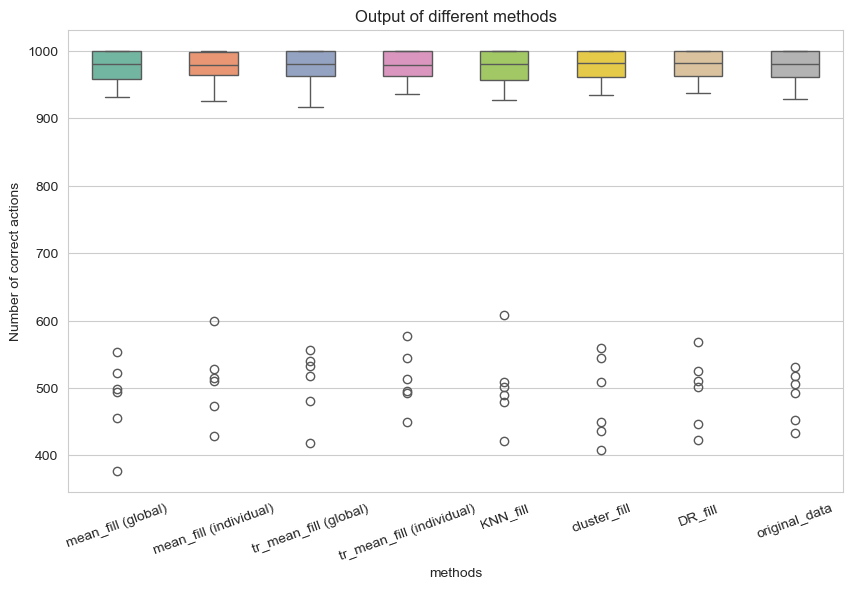

In [153]:
df_melted = result.melt(var_name='Columns', value_name='Values')

# Create a box plot with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='Set2', width=0.5)

# Add title and labels
plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')

plt.savefig('plots/box_b5wot15.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()